In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [337]:
data=pd.read_excel('Dataset-Kmeans-xclara.xlsx')

In [338]:
data.shape

(3000, 2)

In [339]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


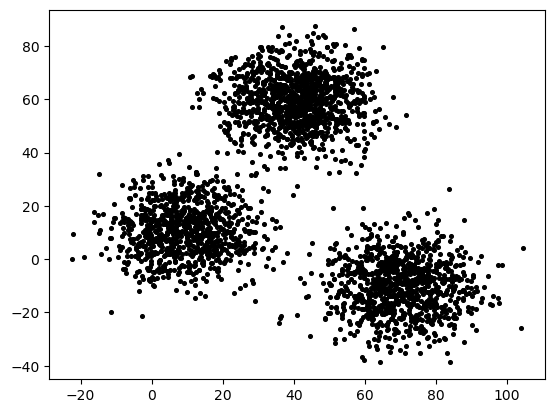

In [340]:
x=data['V1'].values
y=data['V2'].values
X=np.array(list(zip(x, y)))
plt.scatter(x, y, c='black', s=7)

In [341]:
def dist(point, centeroid):
    x1=point[0]
    y1=point[1]
    x2=centeroid[0]
    y2=centeroid[1]
    #print((x2-x1)**2)
    #print((y2-y1)**2)
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

In [342]:
dist([2,3],[5,7])

5.0

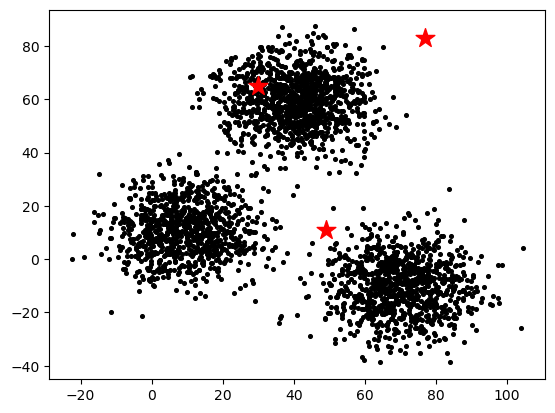

In [343]:
k=3
C_x=np.random.randint(0, np.max(X), size=k)
C_y=np.random.randint(0, np.max(X), size=k)
C=np.array(list(zip(C_x, C_y)), dtype=np.float32)
plt.scatter(x,y, c='black', s=7)
plt.scatter(C_x, C_y, c='red', marker='*', s=200)

In [344]:
X.shape

(3000, 2)

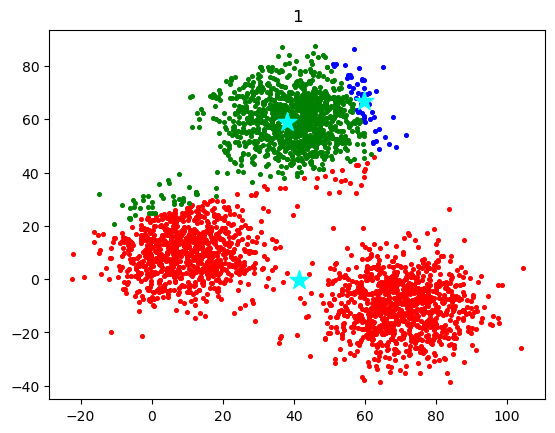

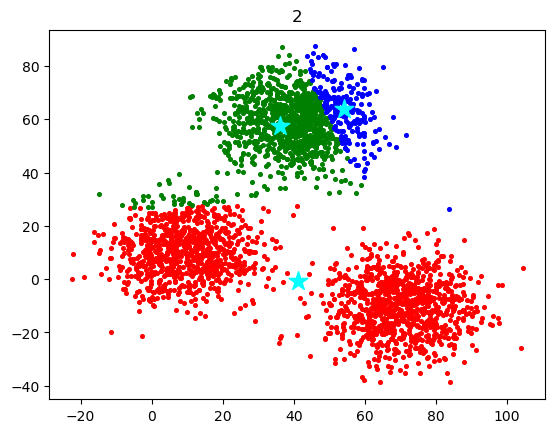

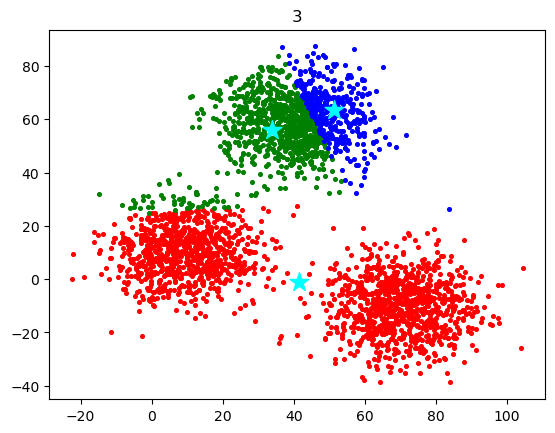

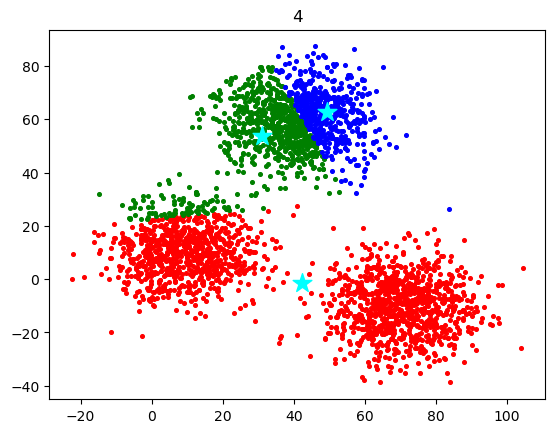

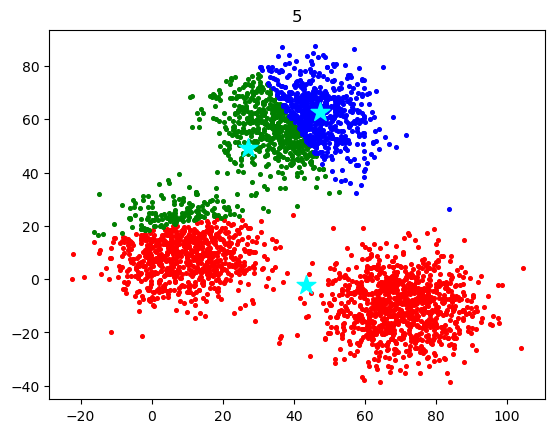

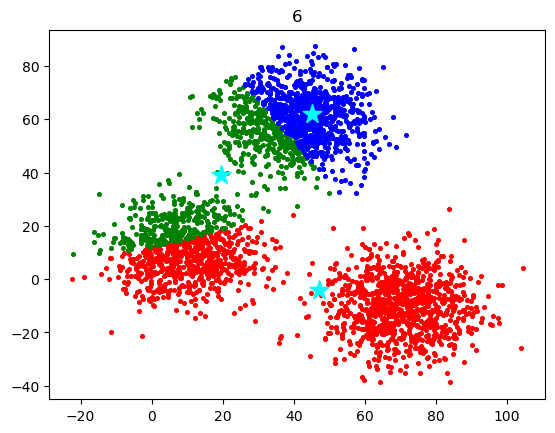

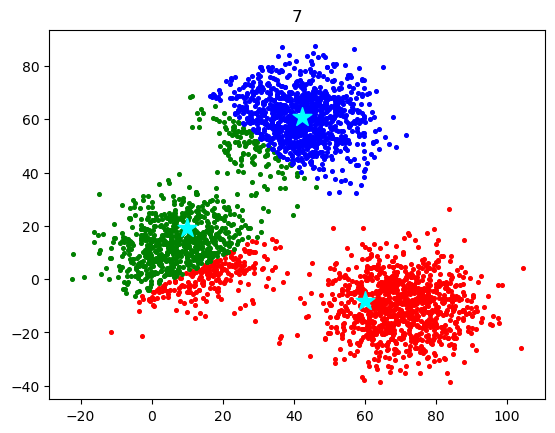

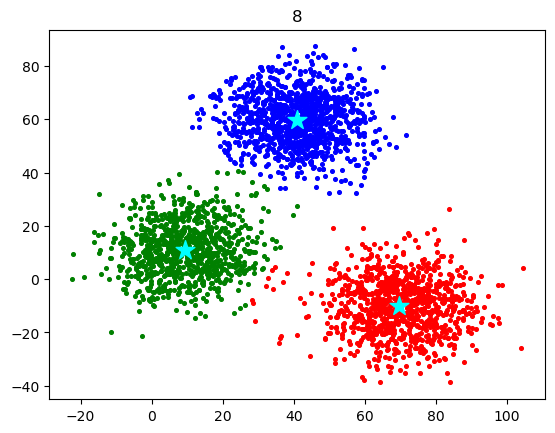

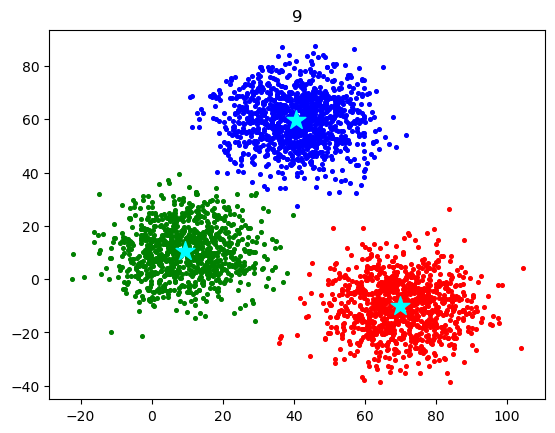

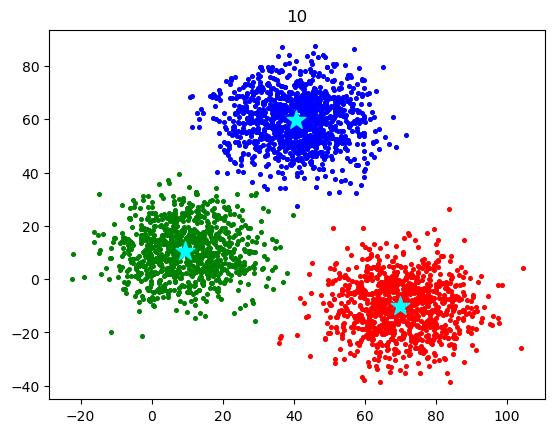

In [345]:
C_old=np.zeros(C.shape)
error=np.zeros(k)
m=1
for i in range(k):
    error[i]=dist(C[i], C_old[i])
while np.all(error)!=0:
    #print(error)
    clusters=np.zeros(len(X))
    distances=np.zeros((X.shape[0], C.shape[0]))
    for i in range(len(X)):
        for j in range(len(C)):
            distances[i][j]=dist(X[i], C[j])
    min_dist=distances.min(axis=1)
    C_old=C.copy()
    #print(error)
    for i in range(len(min_dist)):
        cluster=np.where(distances[i]==min_dist[i])[0][0]
        clusters[i]=cluster
    #print(error)
    for i in range(k):
        points=[X[j] for j in range(len(X)) if clusters[j]==i]
        C[i]=np.mean(points, axis=0)
        #print(C[i], C_old[i])
        error[i]=dist(C[i], C_old[i])
        #print("YESSSSS", C[i], C_old[i])
    #print(error)
    #print(m, "--->", error)
    
    #print("END")
    colors=["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
    fig, ax=plt.subplots()
    #print(m)
    for i in range(k):
        points=np.array([X[j] for j in range(len(X)) if clusters[j]==i])
        
        ax.scatter(points[:, 0], points[:,1], s=7, c=colors[i])
        plt.title("{}".format(m))
    
    m+=1
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c=colors[i-k-1])

In [346]:
C

array([[ 69.92419 , -10.119641],
       [  9.478045,  10.686052],
       [ 40.683628,  59.715893]], dtype=float32)

1
2
3
4
5
6
7


IndexError: index 0 is out of bounds for axis 0 with size 0

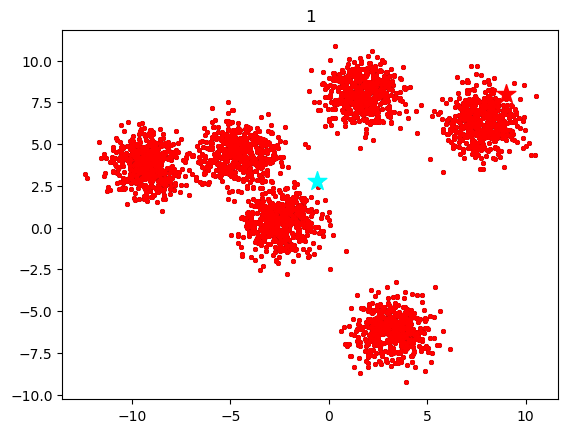

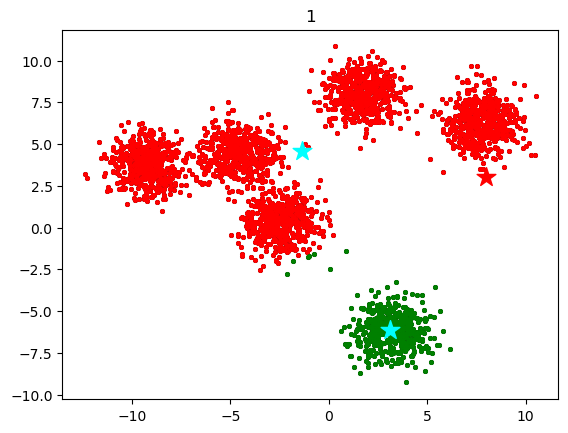

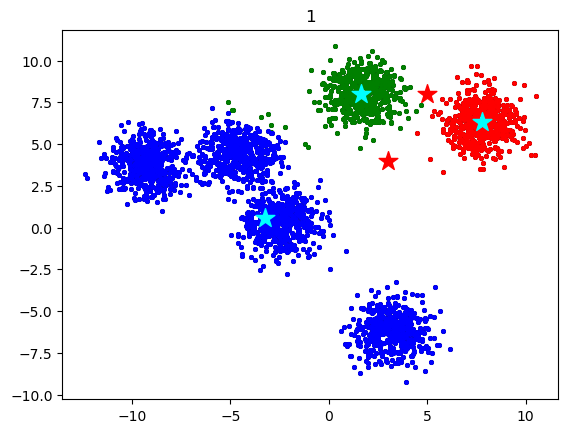

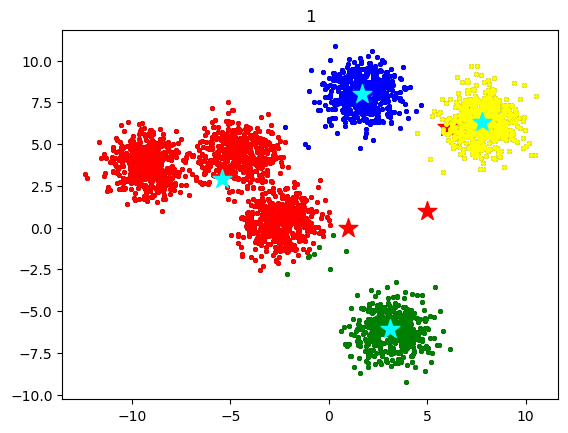

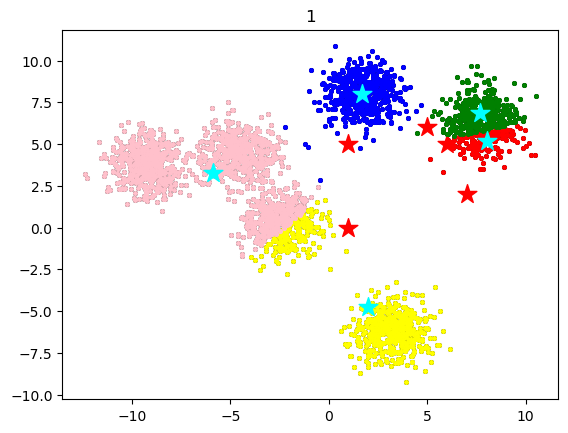

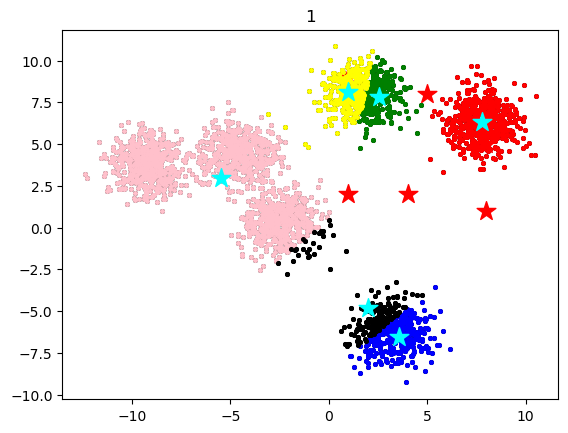

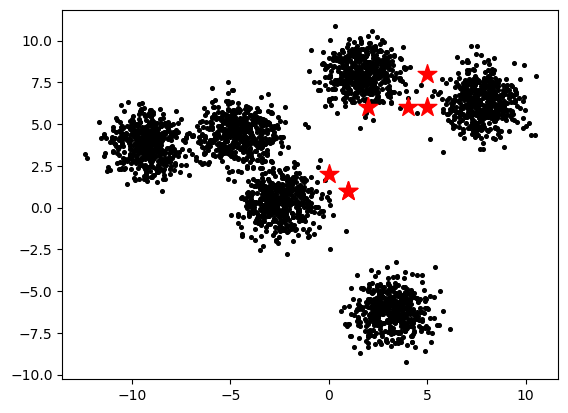

In [322]:
n=10
ssm=np.zeros(n)
colors=["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
for num in range(1, 15):
    k=num
    fig, ax=plt.subplots()
    print(k)
    C_x=np.random.randint(0, np.max(X), size=k)
    C_y=np.random.randint(0, np.max(X), size=k)
    C=np.array(list(zip(C_x, C_y)), dtype=np.float32)
    plt.scatter(x,y, c='black', s=7)
    plt.scatter(C_x, C_y, c='red', marker='*', s=200)
    C_old=np.zeros(C.shape)
    error=np.zeros(k)
    m=1
    for i in range(k):
        error[i]=dist(C[i], C_old[i])
    while np.all(error)!=0:
        #print(error)
        clusters=np.zeros(len(X))
        distances=np.zeros((X.shape[0], C.shape[0]))
        for i in range(len(X)):
            for j in range(len(C)):
                distances[i][j]=dist(X[i], C[j])
        min_dist=distances.min(axis=1)
        C_old=C.copy()
        #print(error)
        for i in range(len(min_dist)):
            cluster=np.where(distances[i]==min_dist[i])[0][0]
            clusters[i]=cluster
        #print(error)
        for i in range(k):
            points=[X[j] for j in range(len(X)) if clusters[j]==i]
            C[i]=np.mean(points, axis=0)
            #print(C[i], C_old[i])
            error[i]=dist(C[i], C_old[i])
            #print("YESSSSS", C[i], C_old[i])
        #print(error)
        #print(m, "--->", error)

        #print("END")
        

    #print(m)

    for i in range(k):
        points=np.array([X[j] for j in range(len(X)) if clusters[j]==i])
        for j in range(len(points)):
            ssm[i]+=dist(points[j], C[i])
        ax.scatter(points[:, 0], points[:,1], s=7, c=colors[i])
        plt.title("{}".format(m))

    m+=1
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c=colors[i-k-1])

In [241]:
C_old

array([[43.50613 , 64.05819 ],
       [63.94942 ,  2.722134],
       [11.881928, 15.052175],
       [      nan,       nan]], dtype=float32)

In [242]:
error

array([45.493907  ,  7.95307976, 24.33246095,         nan])

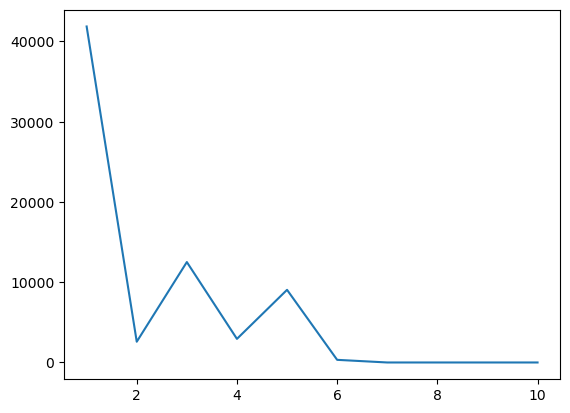

In [323]:
plt.plot(range(1, len(ssm)+1), ssm)

In [324]:
C

array([[ 7.791712 ,  5.8255205],
       [ 2.7188413, -5.633595 ],
       [ 5.925786 ,  8.088562 ],
       [       nan,        nan],
       [-5.5615425,  3.0031767],
       [ 3.4366243,  6.748279 ],
       [ 1.3121047,  7.843393 ]], dtype=float32)

In [46]:
ssm

array([212460.83740293,  61845.39338394,  53469.08010478,  20897.05153174,
        28974.28473017,  13198.9352587 ,  11481.35249596,   5895.08429627,
        12250.27163355,      0.        ])

In [97]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [294]:
X, _ = make_blobs(n_samples=3000, centers=6, n_features=2, random_state=20)

In [295]:
X

array([[-1.29039958,  0.8108851 ],
       [ 7.60534641,  6.78506445],
       [-5.24066098,  4.15714853],
       ...,
       [-2.24301688,  0.4563861 ],
       [-3.95956913,  4.99563176],
       [-3.74458946,  3.83214494]])

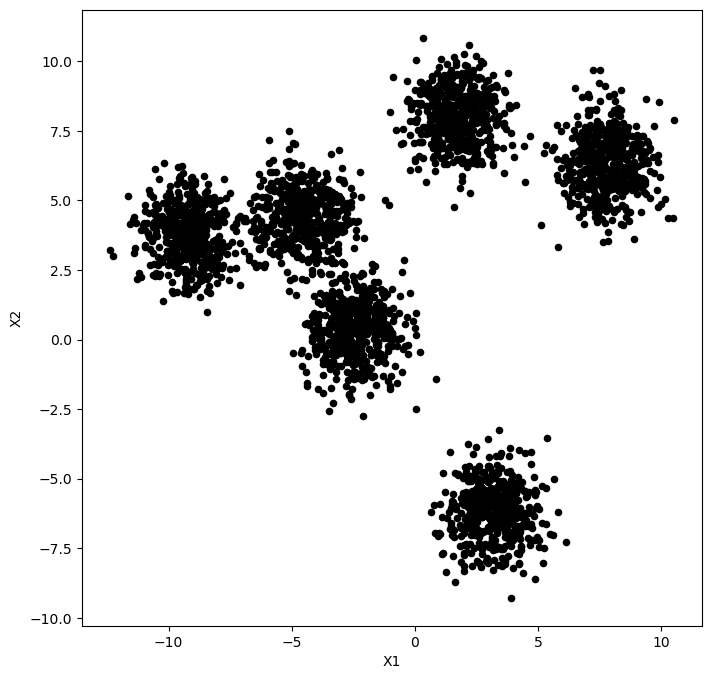

In [296]:
x=X[:, 0]
y=X[:, 1]
df=pd.DataFrame(dict(x=X[:, 0], y=X[:, 1]))
fig, ax=plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y', c='black')
plt.xlabel("X1")
plt.ylabel('X2')
plt.show()